In [ ]:
import pandas as pd
import numpy as np
import random
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Virtual Agriculture Marketplace/AgroPlace_Dataset_6.csv')

In [ ]:
# Select the specified features for X
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

X = data[features]

In [ ]:
# Encode the categorical features using one-hot encoding
# X = pd.get_dummies(X, columns=['Payment'])

# Encode the target variable 'Product Line' using label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Product line'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # Add random noise to numerical features
# noise_level = 0.10
# for feature in features:
#     X_train[feature] += np.random.uniform(-noise_level, noise_level, size=len(X_train))
#     X_test[feature] += np.random.uniform(-noise_level, noise_level, size=len(X_test))

model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)
predicted_product_lines = label_encoder.inverse_transform(predictions)

# Count the occurrences of each product in the predictions
product_counts = Counter(predicted_product_lines)

# Find the top three most frequent products as the trending products
trending_products = [product for product, _ in product_counts.most_common(3)]

print(f'Top Trending Products: {trending_products}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Top Trending Products: ['Potatoes', 'Wheat', 'Broccoli']


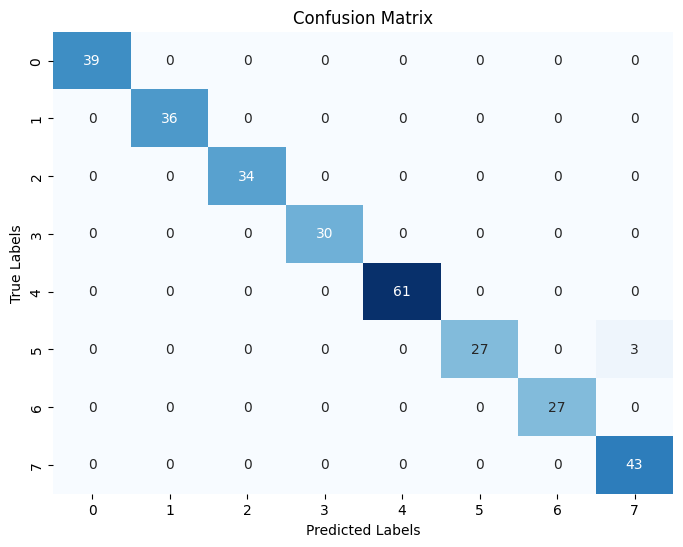

In [ ]:
# Confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
classification_rep = classification_report(y_test, predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        61
           5       1.00      0.90      0.95        30
           6       1.00      1.00      1.00        27
           7       0.93      1.00      0.97        43

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



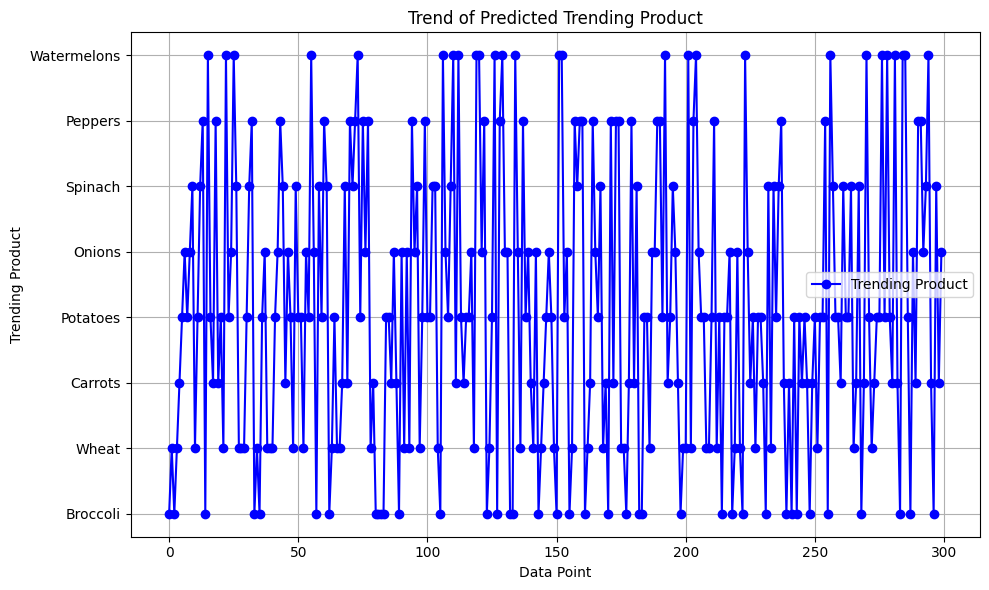

In [ ]:
# Create a line graph to visualize the trend of the predicted trending product
plt.figure(figsize=(10, 6))
plt.plot(predicted_product_lines, marker='o', linestyle='-', color='b', label='Trending Product')
plt.title('Trend of Predicted Trending Product')
plt.xlabel('Data Point')
plt.ylabel('Trending Product')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

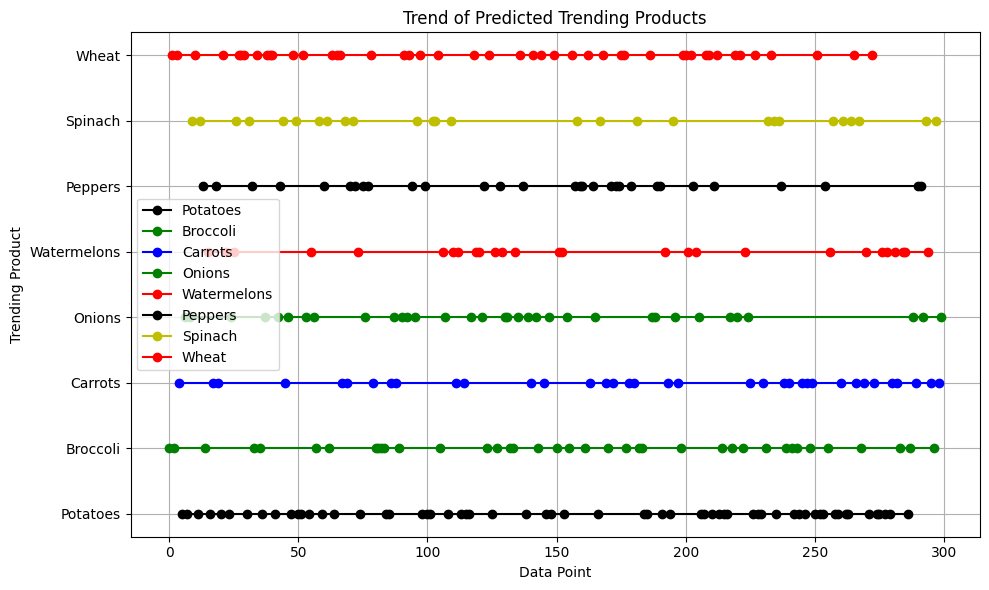

In [ ]:
# Create a line graph to visualize the trend of the predicted trending product with different colors
plt.figure(figsize=(10, 6))

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Iterate through the predicted product lines and assign a random color to each product
for product_line in set(predicted_product_lines):
    color = random.choice(colors)
    mask = predicted_product_lines == product_line
    plt.plot(np.arange(len(predicted_product_lines))[mask], predicted_product_lines[mask],
             marker='o', linestyle='-', color=color, label=product_line)

plt.title('Trend of Predicted Trending Products')
plt.xlabel('Data Point')
plt.ylabel('Trending Product')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


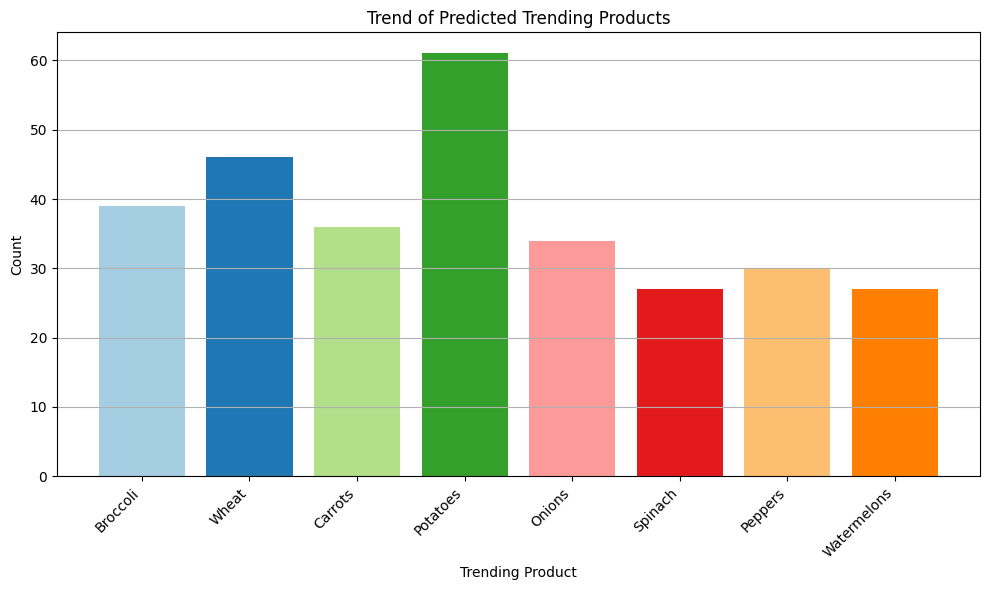

In [ ]:
# Create a dictionary to count the occurrences of each predicted product
product_counts = {}
for product in predicted_product_lines:
    if product in product_counts:
        product_counts[product] += 1
    else:
        product_counts[product] = 1

# Extract product names and counts
products = list(product_counts.keys())
counts = list(product_counts.values())

# Define a list of colors for the bars
colors = [plt.cm.Paired(i) for i in range(len(products))]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(products, counts, color=colors)
plt.title('Trend of Predicted Trending Products')
plt.xlabel('Trending Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pickle
# Save the model to a .pkl file
with open('agroplace_model_4.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(data['Product line'])

joblib.dump(label_encoder, 'label_encoder.pkl')